In [1]:
#importing the required libraries
import os
import time
import re
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import snscrape.modules.twitter as sntwitter

import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from ast import literal_eval
from datetime import datetime 
from wordcloud import WordCloud
from bs4 import BeautifulSoup

import sklearn
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sanchu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanchu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sanchu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#setting up the directory
#root_dir = os.path.abspath(os.path.join(os.path.dirname("."), '.'))
#output: /Users/sbp

In [3]:
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAOVLlQEAAAAAuNytisymn%2FEn21utwOS5eMXkhvc%3DObb0NBIzMtt8IkSm6uYgQ9YrMtiCURSu5M7llg7C7pmvRMle4W'

In [4]:
# To set your environment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'

search_url = "https://api.twitter.com/2/tweets/search/recent"

# Optional params: start_time,end_time,since_id,until_id,max_results,next_token,
# expansions,tweet.fields,media.fields,poll.fields,place.fields,user.fields
query_params = {'query':'antiveganism','tweet.fields': 'author_id','max_results':100}


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


def main():
    json_response = connect_to_endpoint(search_url, query_params)
    twitter_results = json.dumps(json_response, indent=4, sort_keys=True)
    return twitter_results

if __name__ == "__main__":
    twitter_results = main()

200


In [5]:
print(twitter_results)

{
    "data": [
        {
            "author_id": "3310903898",
            "edit_history_tweet_ids": [
                "1630411108250157057"
            ],
            "id": "1630411108250157057",
            "text": "@antiveganism_ im sorry but anything below a perfect 70\u00b0F is freezing to my californian ass"
        },
        {
            "author_id": "1629329405662347266",
            "edit_history_tweet_ids": [
                "1630332165014843393"
            ],
            "id": "1630332165014843393",
            "text": "@CGMeifangZhang @LuiLainez001 [\"I know '[the factory farmed]' feel some type of way about antiveganism/carnism.\"]"
        },
        {
            "author_id": "976191291699556352",
            "edit_history_tweet_ids": [
                "1628751296881905664"
            ],
            "id": "1628751296881905664",
            "text": "@Veganfitventure Too funny re your previous antiVeganism \ud83d\ude02"
        }
    ],
    "meta": {
        "newest_

In [6]:
topics = ["Veganism","Supplement","Animal Rights","Meat Lover"]
Endpoint = "https://newsapi.org/v2/everything"
Appikey = "2507730edc7f4b71bc88809641612caa"
path = 'C:/Users/Sanchu/Desktop/MS/ML/TextMining'

In [7]:
###Extracting the data from the api
###Creating corpus with the description as the content in the .txt file
Content = []
Labels = []
with open( path +"/"+"Vegan_News.csv", "w+", encoding="utf-8") as file_obj:
    for topic in topics :
        response=requests.get(Endpoint, {'apiKey':Appikey,'q':topic})
        print(response)
        jsontxt = response.json()
        print(jsontxt)
        for i,article in enumerate(jsontxt["articles"]):
            description = jsontxt["articles"][i]['description']
            description=str(description)
            description=re.sub(r'[,.;@#?!&$\-\']+', ' ', description, flags=re.IGNORECASE)
            description=re.sub(' +', ' ', description, flags=re.IGNORECASE)
            description=re.sub(r'\"', ' ', description, flags=re.IGNORECASE)
            description=re.sub(r'[^a-zA-Z]', " ", description, flags=re.VERBOSE)
            ## Be sure there are no commas in the headlines or it will
            ## write poorly to a csv file....
            description=description.replace(',', '')
            description=' '.join(description.split())
            descriptionfinal=re.sub("\n|\r", "", description)
            labels = topic
            Content.append(descriptionfinal)
            Labels.append(labels)
            row = str(labels)+ "," + str(descriptionfinal) +"\n"
            file_obj.write(row) 

<Response [200]>
{'status': 'ok', 'totalResults': 138, 'articles': [{'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Jude Whiley', 'title': 'Yes, Lab-Grown Meat Is Vegan', 'description': 'This new technology offers an opportunity to free animals from exploitation. So why are some vegans opposed to it?', 'url': 'https://www.wired.com/story/lab-grown-meat-vegan-ethics-environment/', 'urlToImage': 'https://media.wired.com/photos/63f014607d87edd2f4f35129/191:100/w_1280,c_limit/ideas_labgrown_meat_vegan_animals_ethics.jpg', 'publishedAt': '2023-02-19T12:00:00Z', 'content': 'I wish I came to veganism through an epiphany about the right to personhood of animals, or recognition of the environmental harm that animal farming causes. But I didnt. What turned me vegan was a ni… [+3568 chars]'}, {'source': {'id': None, 'name': 'The Guardian'}, 'author': 'Lizzy Davies', 'title': 'Rainbow plates: the chefs reawakening Africa’s taste for vegan food', 'description': 'Can innovative cooks and ent

<Response [200]>
{'status': 'ok', 'totalResults': 4893, 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'}, 'author': 'Meredith Dietz', 'title': "Why You Shouldn't Use AI for Your Cover Letters", 'description': 'Your résumé is polished, your interview skills are strong, but there’s one thing standing between you and your ability to press “submit” on a job application: the cover letter. For many job-seekers, writing a cover letter is soul-sucking and time-consuming. I…', 'url': 'https://lifehacker.com/why-you-shouldnt-use-ai-for-your-cover-letters-1850067441', 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/496f67bf1ba66981bbbb82f7baa2bf95.jpg', 'publishedAt': '2023-02-03T16:30:00Z', 'content': 'Your résumé is polished, your interview skills are strong, but theres one thing standing between you and your ability to press submit on a job application: the cover letter. For many job-seekers, wri… [+262

<Response [200]>
{'status': 'ok', 'totalResults': 1328, 'articles': [{'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 'gkay@insider.com (Grace Kay)', 'title': "Elon Musk's brain-chip startup is being investigated over potentially moving hazardous pathogens after monkey tests", 'description': 'An animal rights group had reached out to the agency alleging Neuralink had not properly transported brain chips from monkey test subjects.', 'url': 'https://www.businessinsider.com/elon-musk-neuralink-brain-chip-investigated-potential-hazardous-pathogens-monkeys-2023-2', 'urlToImage': 'https://i.insider.com/63e53ab927e5db0018eef216?width=1200&format=jpeg', 'publishedAt': '2023-02-09T20:58:06Z', 'content': "The US Department of Transportation (DOT) is investigating Elon Musk's brain-chip startup, Neuralink, over concerns the company may have transported hazardous pathogens.\r\nA DOT spokesperson confirmed… [+2982 chars]"}, {'source': {'id': None, 'name': 'The Guardian'}

<Response [200]>
{'status': 'ok', 'totalResults': 88, 'articles': [{'source': {'id': 'time', 'name': 'Time'}, 'author': 'John Simons', 'title': 'Impossible Foods CEO Peter McGuinness Has Beef With How the Media Portrays Plant-Based Meat', 'description': 'He took out a full-page ad in the New York Times to bust myths about plant-based meat.', 'url': 'https://time.com/6251008/peter-mcguinness-impossible-foods-myths/', 'urlToImage': 'https://api.time.com/wp-content/uploads/2023/01/peter-mcguinness-impossible-foods-crop.jpg?quality=85&w=1200&h=628&crop=1', 'publishedAt': '2023-01-29T14:00:01Z', 'content': 'In 2023, TIME will once again recognize 100 businesses making an extraordinary impact around the world. Applications for theTIME100 Most Influential Companies of 2023 are open, now through March 1, 2… [+11648 chars]'}, {'source': {'id': None, 'name': 'Boing Boing'}, 'author': "Boing Boing's Shop", 'title': "This exotic jerky bouquet is only $49.99 and will arrive in time for Valentine's 

In [8]:
URL = ["https://www.healthline.com/nutrition/vegan-vs-vegetarian",
       "https://blog.insidetracker.com/vegans-vs-non-vegans-who-is-healthier",
       "https://www.precisionnutrition.com/vegan-vs-meat-eater",
       "https://www.naturespath.com/en-us/blog/vegetarian-vs-vegan-whats-the-difference/"]
Paragraph = []

In [9]:
# link for extract html data
def getdata(url):
    respon = requests.get(url)
    return respon.text

for url in URL:
    htmldata = getdata(url)
    soup = BeautifulSoup(htmldata, 'html.parser')
    data = ''
    for data in soup.find_all("p"):
        text = data.get_text()
        text= re.sub(r'[^a-zA-Z]', " ", text, flags=re.VERBOSE)
        Paragraph.append(text)
        
print(Paragraph)

['A vegetarian does not eat any animal flesh such as meat  poultry  or fish  A vegan is a stricter vegetarian who also avoids consuming dairy  eggs  and any other ingredients derived from animals  ', 'Vegetarian diets have reportedly been around since as early as     B C  ', 'Several types exist  and individuals may practice them for a variety of reasons  These include health  ethics  environmentalism  and religion  ', 'Vegan diets appeared a little more recently  but have been getting a good amount of press  ', 'This article takes a look at the similarities and differences between these two diets ', 'It also discusses how they affect your health and the environment ', ' According to the Vegetarian Society  a vegetarian is someone who does not eat any meat  poultry  game  fish  shellfish  or by products of animal slaughter    ', 'Vegetarian diets contain various levels of fruits  vegetables  grains  pulses  nuts  and seeds  ', 'The inclusion of dairy  honey  and eggs depends on the typ

In [10]:
#Extractor Module
class ExtractTweets:
    
    def __init__(self, 
                 minTweetCountPerDay=10, 
                 minRetweetCount=0,
                 minLikeCount=0, 
                 minFollowersCount=0, 
                 VerifiedStatus=None, 
                 saveBufferDuration=3600):
        """
        Accepts basic input params each of integer datatype, except for VerifiedStatus which accepts boolean or None.
        """
        self.start_timer = datetime.strptime(time.strftime("%Y-%m-%d %H:%M:%S"), "%Y-%m-%d %H:%M:%S")
        self.min_tweet_count_perDay = minTweetCountPerDay
        self.minRetweetCount = minRetweetCount
        self.minLikeCount = minLikeCount
        self.minFollowersCount = minFollowersCount
        self.VerifiedStatus = VerifiedStatus                           
        self.tweets_df = pd.DataFrame(columns=['date', 'tweet', 'lang', 'retweetCount', 'likeCount', 'replyCount', 
                                               'username', 'user_followersCount','user_friendsCount', 'verifiedStatus', 
                                               'tweet_url', 'hastags', 'chr_count', 'topic'])
        self.save_buffer_duration = saveBufferDuration
        return

    def save_copy(self):
        """
        Saves a temp copy for restoration and prevent API time limit exceed error.
        
        :return:
        pandas dataframe containing twitter record-data.
        """
        data = self.tweets_df.reset_index(drop=True)
        data['date'] = data['date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
        for filename in os.listdir("."):
            if filename.endswith('local.csv'):
                os.remove(filename)
        data.to_csv("./save_{}_local.csv".format(data.date.max()), index=False)
        return data
        
    def getTweets(self, start_date, end_date, keywords):
        """
        Extracts historical twitter data.
        
        :params:
        start_date - str in "YYYY-MM-DD" format
        end_date - str in "YYYY-MM-DD" format
        keywords - list of tuples, 
            e.g, [('recession'), ('football, 'worldcup', 'fifa'), ('war', 'ukraine')]
            e.g. ['recession']
        
        :return:
        pandas dataframe with features as:
         date: Tweet Timestamp
         tweet: tweet content
         lang: language classifer used by parent api
         retweetCount: tweet retweeted count
         likeCount: tweet like count
         replyCount: number of replies to original tweet
         username: user who tweeted
         user_followersCount: number of followers user has (tells you how popular the avg tweets are)
         user_friendsCount: number of friends user has
         verifiedStatus: If the user is Verified or not (i.e. pays 8 bucks every month!)
         tweet_url: Link of original tweet (click and see)
         hastags: If any hastags were used (hastags are important for search and info retrieval)
         chr_count: number of english characters in the original tweet
         topic: keywords you used for searching tweets (kind of labels)
        """
        
        if not(isinstance(keywords, list) or isinstance(keywords, tuple)):
            raise Exception("Incorrect Input Format! Please pass a list")
        
        for topic in keywords:
            # for saving local copies every buffer_hour
            st_time = datetime.strptime(time.strftime("%Y-%m-%d %H:%M:%S"), "%Y-%m-%d %H:%M:%S")
            date = pd.to_datetime(start_date, format='%Y-%m-%d')
            e_date = pd.to_datetime(end_date, format='%Y-%m-%d') + pd.to_timedelta(1, unit='d')
            if isinstance(topic, tuple) or isinstance(topic, list):
                topic = " ".join(topic)
            search_query = topic
            print("search_query:", search_query)
        
            while date != e_date:
                nxt_date = date + pd.to_timedelta(1, unit='d')
                content = '{} since:{} until:{}'.format(search_query, date.strftime('%Y-%m-%d'), nxt_date.strftime('%Y-%m-%d'))
                print(content)
                
                # check for save buffer duration (set to 1 Hr by default)
                delta_buffer = (datetime.strptime(time.strftime("%Y-%m-%d %H:%M:%S"), "%Y-%m-%d %H:%M:%S") - st_time).seconds
                if delta_buffer >= self.save_buffer_duration:
                    self.save_copy()
                    # reset buffer
                    st_time = datetime.strptime(time.strftime("%Y-%m-%d %H:%M:%S"), "%Y-%m-%d %H:%M:%S")

                lst_tweets = []
                for counter, tweet in enumerate(sntwitter.TwitterSearchScraper(content).get_items()):
                    if counter+1 > self.min_tweet_count_perDay: 
                        break
                    if tweet.likeCount >= self.minLikeCount \
                        or tweet.retweetCount >= self.minRetweetCount \
                        or tweet.user.followersCount >= self.minFollowersCount \
                        or (tweet.user.verified and isinstance(tweet.user.verified, bool) and tweet.user.verified == self.VerifiedStatus):
                        
                        # ----------------------------------------------------------------
                        # Potential custom preprocessing module here: 
                        # 1. Simple and short: https://www.kaggle.com/code/zenbird01/pranjalpathak-semantic-clustering-v1-0/notebook
                        # 2. Advanced: ./NLP_basics_preprocessing_vectorization_similarity.ipynb
                        # 3. Best: Check github - https://github.com/pranzell/NLP_Tools
                        # ----------------------------------------------------------------
                        
                        lst_tweets.append([
                            tweet.date, 
                            tweet.content, 
                            tweet.lang,
                            tweet.retweetCount,
                            tweet.likeCount,
                            tweet.replyCount,
                            tweet.user.username, 
                            tweet.user.followersCount, 
                            tweet.user.friendsCount, 
                            tweet.user.verified,
                            tweet.url,
                            tweet.hashtags,
                            len(str(tweet.content).strip()),
                            topic])
                
                self.tweets_df = self.tweets_df.append(pd.DataFrame(lst_tweets, columns=self.tweets_df.columns))
                date = nxt_date
        
        print("\n\nTOTAL TIME TAKEN {} minutes".format(((datetime.strptime(time.strftime("%Y-%m-%d %H:%M:%S"), "%Y-%m-%d %H:%M:%S") - self.start_timer).seconds)/60.0))
        return self.save_copy()
    
    
    def preprocess_shortText(self, text_col):
        # refer to Preprocessing ipynb file
        # https://github.com/pranzell/NLP_Tools
        pass

In [11]:
#Configuration
minTweetCountPerDay=50
minRetweetCount=100
minLikeCount=100
minFollowersCount=200
VerifiedStatus=None
saveBufferDuration=3600 # in seconds

start_date = "2022-06-01"
end_date = "2023-01-31"

# list of tuples, or a list of single str items check function definition `getTweets()`
keywords = [('veganism'), ('vegan','govegan','veganfortheanimals','animalsrights','veganism')]
#Execution
#keywords = [('non veganism'), ('antivegan','exvegan','yestomeat','meatlover','antiveganism')]
#keywords = [('non veganism'), ('antivegan','exvegan','yestomeat','meatlover','antiveganism')]


In [12]:
et = ExtractTweets(minTweetCountPerDay, minRetweetCount, minLikeCount, minFollowersCount, VerifiedStatus, saveBufferDuration)
twitter_data = et.getTweets(start_date, end_date, keywords)

search_query: non veganism
non veganism since:2022-06-01 until:2022-06-02
non veganism since:2022-06-02 until:2022-06-03
non veganism since:2022-06-03 until:2022-06-04
non veganism since:2022-06-04 until:2022-06-05
non veganism since:2022-06-05 until:2022-06-06
non veganism since:2022-06-06 until:2022-06-07
non veganism since:2022-06-07 until:2022-06-08
non veganism since:2022-06-08 until:2022-06-09
non veganism since:2022-06-09 until:2022-06-10
non veganism since:2022-06-10 until:2022-06-11
non veganism since:2022-06-11 until:2022-06-12
non veganism since:2022-06-12 until:2022-06-13
non veganism since:2022-06-13 until:2022-06-14
non veganism since:2022-06-14 until:2022-06-15
non veganism since:2022-06-15 until:2022-06-16
non veganism since:2022-06-16 until:2022-06-17
non veganism since:2022-06-17 until:2022-06-18
non veganism since:2022-06-18 until:2022-06-19
non veganism since:2022-06-19 until:2022-06-20
non veganism since:2022-06-20 until:2022-06-21
non veganism since:2022-06-21 unt

KeyboardInterrupt: 

In [13]:
print(twitter_data.shape)
twitter_data.head(3)

NameError: name 'twitter_data' is not defined

In [ ]:
#twitter_data.to_csv('/Users/sbp/Downloads/vegan1_sanchana.csv', index=False)

In [14]:
Veganism_df = pd.read_csv("C:/Users/Sanchu/Downloads/veganism.csv")
Nonveganism_df = pd.read_csv("C:/Users/Sanchu/Downloads/nonveganism.csv")

In [15]:
Veganism_df.head()
Nonveganism_df.head()

,date,tweet,lang,retweetCount,likeCount,replyCount,username,user_followersCount,user_friendsCount,verifiedStatus,tweet_url,hastags,chr_count,topic
0,2022-06-01,@TheFun96593011 @S_Catsgotmyback @Son_of_Space...,en,0,2,0,ukwondering,2203,2013,False,https://twitter.com/ukwondering/status/1532067...,NaN,430,non veganism
1,2022-06-01,@TheFun96593011 @S_Catsgotmyback @Son_of_Space...,en,0,1,2,ukwondering,2203,2013,False,https://twitter.com/ukwondering/status/1532067...,NaN,340,non veganism
2,2022-06-01,@TheFun96593011 @S_Catsgotmyback @Son_of_Space...,en,0,10,1,ukwondering,2203,2013,False,https://twitter.com/ukwondering/status/1532066...,NaN,354,non veganism
3,2022-06-01,@TheFun96593011 @S_Catsgotmyback @Son_of_Space...,en,0,1,1,ukwondering,2203,2013,False,https://twitter.com/ukwondering/status/1532066...,NaN,366,non veganism
4,2022-06-01,@TheFun96593011 @S_Catsgotmyback @Son_of_Space...,en,0,10,2,ukwondering,2203,2013,False,https://twitter.com/ukwondering/status/1532064...,NaN,466,non veganism


In [16]:
Veganism_df = pd.concat([Veganism_df,Nonveganism_df],axis = 0)

In [17]:
np.shape(Veganism_df)

(8465, 14)

In [18]:
Veganism_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 710
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 8465 non-null   object
 1   tweet                8465 non-null   object
 2   lang                 8465 non-null   object
 3   retweetCount         8465 non-null   int64 
 4   likeCount            8465 non-null   int64 
 5   replyCount           8465 non-null   int64 
 6   username             8465 non-null   object
 7   user_followersCount  8465 non-null   int64 
 8   user_friendsCount    8465 non-null   int64 
 9   verifiedStatus       8465 non-null   bool  
 10  tweet_url            8465 non-null   object
 11  hastags              1882 non-null   object
 12  chr_count            8465 non-null   int64 
 13  topic                8465 non-null   object
dtypes: bool(1), int64(6), object(7)
memory usage: 934.1+ KB


In [19]:
Veganism_df.isnull().sum()

date                      0
tweet                     0
lang                      0
retweetCount              0
likeCount                 0
replyCount                0
username                  0
user_followersCount       0
user_friendsCount         0
verifiedStatus            0
tweet_url                 0
hastags                6583
chr_count                 0
topic                     0
dtype: int64

In [20]:
percent_missing = Veganism_df.isnull().sum() * 100 / len(Veganism_df)
missing_value_df = pd.DataFrame({'column_name': Veganism_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
date,date,0.000000
tweet,tweet,0.000000
lang,lang,0.000000
retweetCount,retweetCount,0.000000
likeCount,likeCount,0.000000
replyCount,replyCount,0.000000
username,username,0.000000
user_followersCount,user_followersCount,0.000000
user_friendsCount,user_friendsCount,0.000000
verifiedStatus,verifiedStatus,0.000000


<AxesSubplot:>

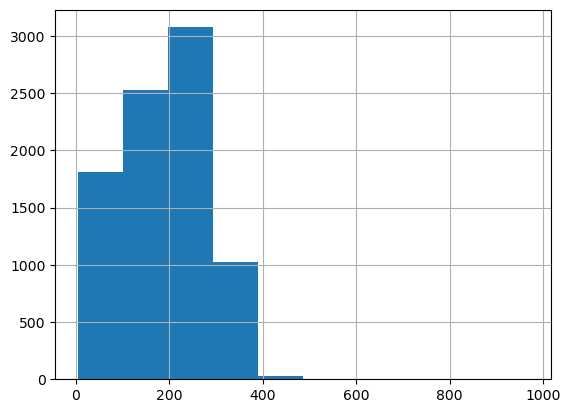

In [21]:
# Character Count in the tweets
Veganism_df['tweet'].str.len().hist()

<AxesSubplot:>

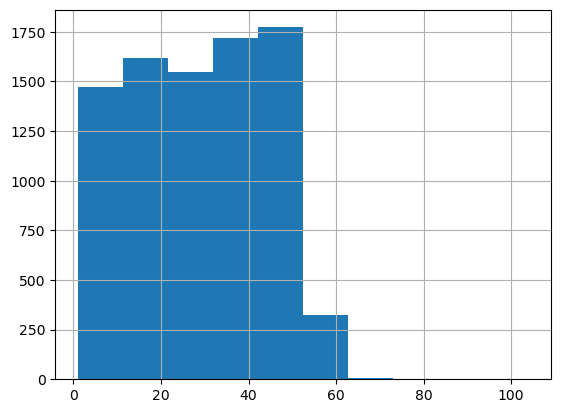

In [22]:
# Code Snippet for Word Number Histogram
Veganism_df['tweet'].str.split().map(lambda x: len(x)).hist()

(array([7718.,  305.,  129.,   63.,   37.,   29.,   28.,   23.,   15.,
          12.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

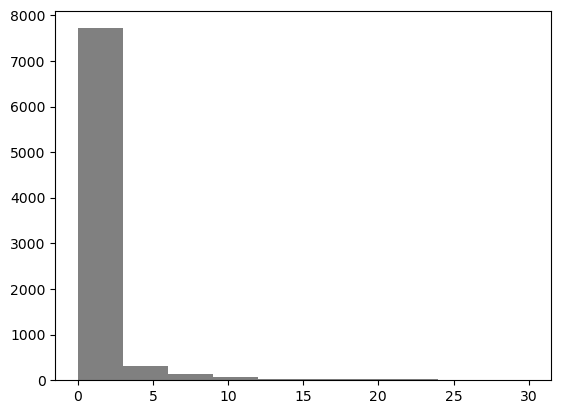

In [23]:
plt.hist(Veganism_df['retweetCount'],range=[0,30], facecolor='gray')

(array([5832., 1042.,  399.,  237.,  140.,  105.,   88.,   63.,   44.,
          46.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

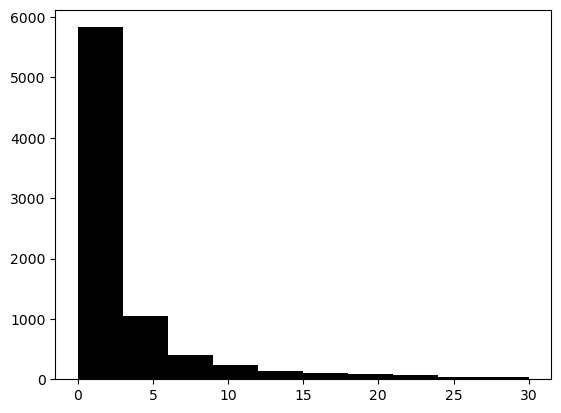

In [24]:
plt.hist(Veganism_df['likeCount'],range=[0,30], facecolor='black')

In [25]:
Veganism_Final_DF = Veganism_df.drop(['hastags','verifiedStatus','tweet_url','lang','retweetCount', 'likeCount','replyCount','chr_count','user_friendsCount'], axis=1)
print(Veganism_Final_DF.columns)
Veganism_Final_DF.isnull().sum()

Index(['date', 'tweet', 'username', 'user_followersCount', 'topic'], dtype='object')


date                   0
tweet                  0
username               0
user_followersCount    0
topic                  0
dtype: int64

In [26]:
Veganism_Final_DF.head()

,date,tweet,username,user_followersCount,topic
0,2022-06-01,#veganism,devinetaylor,2172,veganism
1,2022-06-01,Veganism isn't hard for someone with a conscie...,angylinazayn,647,veganism
2,2022-06-01,@AquafabaMcGee @Veganism I have not met a Vega...,CJaehnKreibaum,411,veganism
3,2022-06-01,veganism isn’t being shoved down your throat d...,veganseatherich,730,veganism
4,2022-06-01,Is #veganism the best Christian option? What i...,DrDPendergrass,17387,veganism


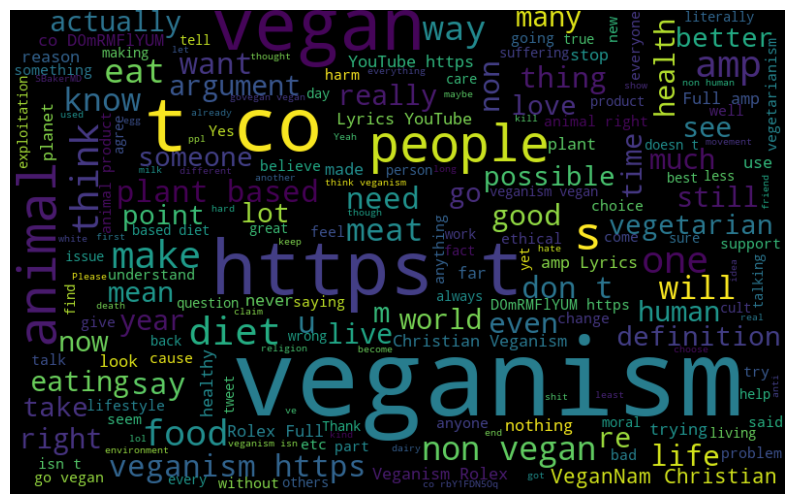

In [27]:
all_words = ''.join([word for word in Veganism_Final_DF['tweet']])
#building a wordcloud on the data from all tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
def remove_URL(tweet):
    #Remove URLs from a sample string
    return re.sub(r"(?:\@#|http?\://|https?\://|www)\S+", "", tweet)
Veganism_Final_DF["tweet"] = Veganism_Final_DF["tweet"].apply(remove_URL)
Veganism_Final_DF["cleaned_tweet"] = Veganism_Final_DF["tweet"].map(lambda x: re.sub(r"[^A-Za-z0-9]+", " ", x))
Veganism_Final_DF

,date,tweet,username,user_followersCount,topic,cleaned_tweet
0,2022-06-01,#veganism,devinetaylor,2172,veganism,veganism
1,2022-06-01,Veganism isn't hard for someone with a conscie...,angylinazayn,647,veganism,Veganism isn t hard for someone with a conscie...
2,2022-06-01,@AquafabaMcGee @Veganism I have not met a Vega...,CJaehnKreibaum,411,veganism,AquafabaMcGee Veganism I have not met a Vegan...
3,2022-06-01,veganism isn’t being shoved down your throat d...,veganseatherich,730,veganism,veganism isn t being shoved down your throat d...
4,2022-06-01,Is #veganism the best Christian option? What i...,DrDPendergrass,17387,veganism,Is veganism the best Christian option What is ...
...,...,...,...,...,...,...
706,2023-01-30,@KatWeegee You're astroturfing veganism into o...,Fishandcow101,271,non veganism,KatWeegee You re astroturfing veganism into o...
707,2023-01-31,One of my fav orgs ever does an awesome month ...,thevegdoc,1244,non veganism,One of my fav orgs ever does an awesome month ...
708,2023-01-31,Superstar Rajinikanth Advises his fans to be V...,VoicelessRights,825,non veganism,Superstar Rajinikanth Advises his fans to be V...
709,2023-01-31,@bogleech @NiklausNDolores Scientists find the...,JoninaTurzi,327,non veganism,bogleech NiklausNDolores Scientists find the ...


In [29]:
Veganism_Final_DF.to_csv("C:/Users/Sanchu/Downloads/cleanedveganism.csv")

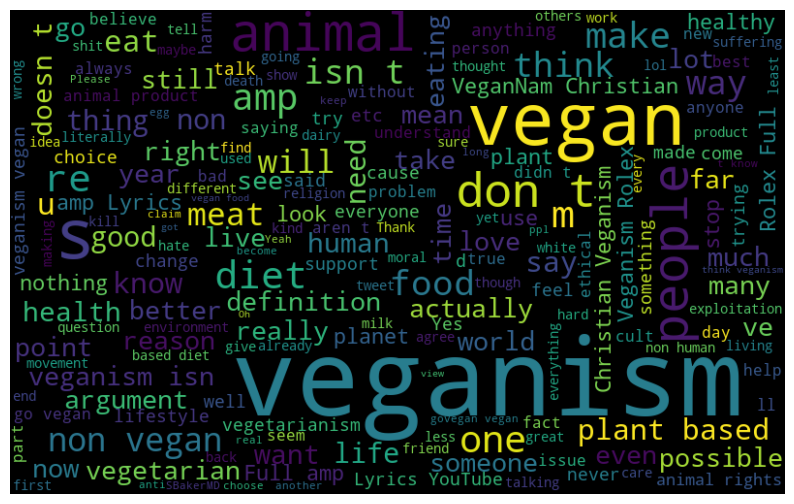

In [30]:
all_words = ''.join([word for word in Veganism_Final_DF['cleaned_tweet']])
#building a wordcloud on the data from all tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<AxesSubplot:>

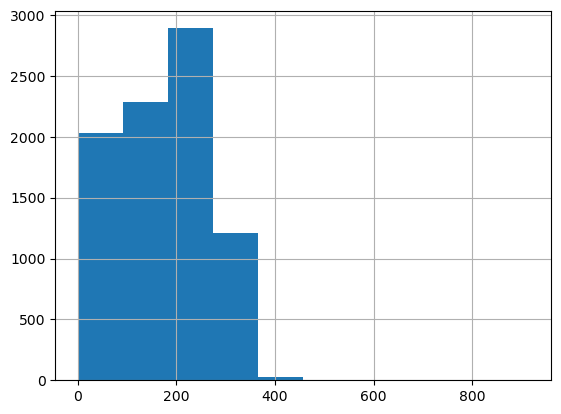

In [31]:
# Character Count in the cleaned tweets
Veganism_Final_DF['cleaned_tweet'].str.len().hist()

<AxesSubplot:>

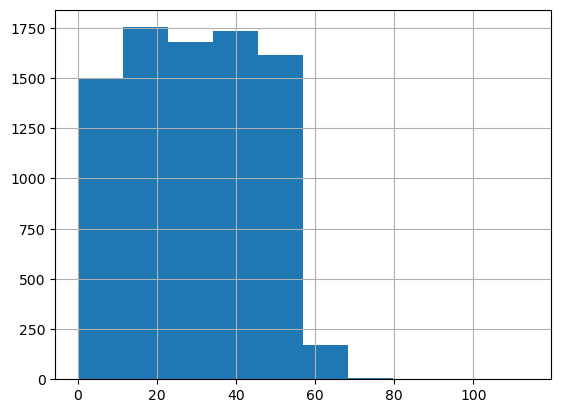

In [32]:
# Code Snippet for Word Number Histogram
Veganism_Final_DF['cleaned_tweet'].str.split().map(lambda x: len(x)).hist()

In [33]:
CountVec = CountVectorizer(input = "content",max_features=1000,stop_words="english")
CountVec_Fit = CountVec.fit_transform(Content)
DF_Col = CountVec.get_feature_names_out()
CountVec_DF=pd.DataFrame(CountVec_Fit.toarray(),columns=DF_Col)
CountVec_DF.insert(0, 'Label', Labels)

In [34]:
CountVec_DF

,Label,abortion,according,act,activist,activists,actor,actually,addition,adults,...,work,world,worried,worst,worth,xbox,year,years,york,zoos
0,Veganism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Veganism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Veganism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Veganism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Veganism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Meat Lover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,Meat Lover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
385,Meat Lover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
386,Meat Lover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
CountVec_tweet = CountVectorizer(analyzer='word',max_features=1000,stop_words="english",max_df=1.0, min_df=1)
CountVec_tweet_Fit = CountVec_tweet.fit_transform(Veganism_Final_DF['cleaned_tweet'])
DF_Col_tweet = CountVec_tweet.get_feature_names_out()
CountVec_tweet_DF=pd.DataFrame(CountVec_tweet_Fit.toarray(),columns=DF_Col_tweet)
#CountVec_tweet_DF.insert(0,'Label',Veganism_Final_DF['topic'])
CountVec_tweet_DF

remove_columns = []
## Remove columns that contains numbers
for item in DF_Col_tweet:
    if(re.search(r'[^A-Za-z\s+]+', item)):
        remove_columns.append(item)

Final_CountVec_tweet_DF = CountVec_tweet_DF.drop(columns = remove_columns,axis = 1)

In [36]:
Final_CountVec_tweet_DF

,able,ableist,abortion,absolutely,abuse,accessible,according,account,act,action,...,writing,wrong,yeah,year,years,yes,yoga,young,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
TFid_Vec=TfidfVectorizer(input='content', stop_words="english",max_features=1000)
TFid_Vec_fit = TFid_Vec.fit_transform(Paragraph)
TF_DF_Colnames=TFid_Vec.get_feature_names_out()
DF_TF=pd.DataFrame(TFid_Vec_fit.toarray(),columns=TF_DF_Colnames)

In [38]:
DF_TF

,absorb,absorption,academy,acceptable,accessibility,according,acids,acknowledged,acting,activities,...,wellness,willing,women,wool,words,works,written,yogurt,zinc,zoos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
lemmatizer = WordNetLemmatizer()
lemmatized_sentences = []

def lemmatize_sentences(Paragraph):
    for sentence in Paragraph:
        words = word_tokenize(sentence)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        lemmatized_sentence = " ".join(lemmatized_words)
        lemmatized_sentences.append(lemmatized_sentence)
    return lemmatized_sentences

lemmatized_sentences = lemmatize_sentences(Paragraph)
print(lemmatized_sentences)


['A vegetarian doe not eat any animal flesh such a meat poultry or fish A vegan is a stricter vegetarian who also avoids consuming dairy egg and any other ingredient derived from animal', 'Vegetarian diet have reportedly been around since a early a B C', 'Several type exist and individual may practice them for a variety of reason These include health ethic environmentalism and religion', 'Vegan diet appeared a little more recently but have been getting a good amount of press', 'This article take a look at the similarity and difference between these two diet', 'It also discus how they affect your health and the environment', 'According to the Vegetarian Society a vegetarian is someone who doe not eat any meat poultry game fish shellfish or by product of animal slaughter', 'Vegetarian diet contain various level of fruit vegetable grain pulse nut and seed', 'The inclusion of dairy honey and egg depends on the type of diet you follow', 'The most common type of vegetarian include', 'People 

In [40]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokenized_text = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokenized_text]
    return ' '.join(lemmatized_words)

Veganism_Final_DF['Lemm_cleaned_tweet'] = Veganism_Final_DF['cleaned_tweet'].apply(lemmatize_text)
Veganism_Final_DF

,date,tweet,username,user_followersCount,topic,cleaned_tweet,Lemm_cleaned_tweet
0,2022-06-01,#veganism,devinetaylor,2172,veganism,veganism,veganism
1,2022-06-01,Veganism isn't hard for someone with a conscie...,angylinazayn,647,veganism,Veganism isn t hard for someone with a conscie...,Veganism isn t hard for someone with a conscie...
2,2022-06-01,@AquafabaMcGee @Veganism I have not met a Vega...,CJaehnKreibaum,411,veganism,AquafabaMcGee Veganism I have not met a Vegan...,AquafabaMcGee Veganism I have not met a Vegan ...
3,2022-06-01,veganism isn’t being shoved down your throat d...,veganseatherich,730,veganism,veganism isn t being shoved down your throat d...,veganism isn t being shoved down your throat d...
4,2022-06-01,Is #veganism the best Christian option? What i...,DrDPendergrass,17387,veganism,Is veganism the best Christian option What is ...,Is veganism the best Christian option What is ...
...,...,...,...,...,...,...,...
706,2023-01-30,@KatWeegee You're astroturfing veganism into o...,Fishandcow101,271,non veganism,KatWeegee You re astroturfing veganism into o...,KatWeegee You re astroturfing veganism into ou...
707,2023-01-31,One of my fav orgs ever does an awesome month ...,thevegdoc,1244,non veganism,One of my fav orgs ever does an awesome month ...,One of my fav orgs ever doe an awesome month a...
708,2023-01-31,Superstar Rajinikanth Advises his fans to be V...,VoicelessRights,825,non veganism,Superstar Rajinikanth Advises his fans to be V...,Superstar Rajinikanth Advises his fan to be Ve...
709,2023-01-31,@bogleech @NiklausNDolores Scientists find the...,JoninaTurzi,327,non veganism,bogleech NiklausNDolores Scientists find the ...,bogleech NiklausNDolores Scientists find the o...


In [41]:
stemmer = PorterStemmer()
stemmed_sentences = []
def stem_sentences(Paragraph):
    for sentence in Paragraph:
        words = word_tokenize(sentence)
        stemmed_words = [stemmer.stem(word) for word in words]
        stemmed_sentence = " ".join(stemmed_words)
        stemmed_sentences.append(stemmed_sentence)
    return stemmed_sentences

stemmed_sentences = stem_sentences(Paragraph)
print(stemmed_sentences)


['a vegetarian doe not eat ani anim flesh such as meat poultri or fish a vegan is a stricter vegetarian who also avoid consum dairi egg and ani other ingredi deriv from anim', 'vegetarian diet have reportedli been around sinc as earli as b c', 'sever type exist and individu may practic them for a varieti of reason these includ health ethic environment and religion', 'vegan diet appear a littl more recent but have been get a good amount of press', 'thi articl take a look at the similar and differ between these two diet', 'it also discuss how they affect your health and the environ', 'accord to the vegetarian societi a vegetarian is someon who doe not eat ani meat poultri game fish shellfish or by product of anim slaughter', 'vegetarian diet contain variou level of fruit veget grain puls nut and seed', 'the inclus of dairi honey and egg depend on the type of diet you follow', 'the most common type of vegetarian includ', 'peopl who do not eat meat or poultri but do consum fish are consid 

In [42]:
stemmer = PorterStemmer()

def stem_text(text):
    tokenized_text = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in tokenized_text]
    return ' '.join(stemmed_words)

Veganism_Final_DF['Stem_cleaned_tweet'] = Veganism_Final_DF['cleaned_tweet'].apply(stem_text)
Veganism_Final_DF


,date,tweet,username,user_followersCount,topic,cleaned_tweet,Lemm_cleaned_tweet,Stem_cleaned_tweet
0,2022-06-01,#veganism,devinetaylor,2172,veganism,veganism,veganism,vegan
1,2022-06-01,Veganism isn't hard for someone with a conscie...,angylinazayn,647,veganism,Veganism isn t hard for someone with a conscie...,Veganism isn t hard for someone with a conscie...,vegan isn t hard for someon with a conscienc b...
2,2022-06-01,@AquafabaMcGee @Veganism I have not met a Vega...,CJaehnKreibaum,411,veganism,AquafabaMcGee Veganism I have not met a Vegan...,AquafabaMcGee Veganism I have not met a Vegan ...,aquafabamcge vegan i have not met a vegan or p...
3,2022-06-01,veganism isn’t being shoved down your throat d...,veganseatherich,730,veganism,veganism isn t being shoved down your throat d...,veganism isn t being shoved down your throat d...,vegan isn t be shove down your throat daili bu...
4,2022-06-01,Is #veganism the best Christian option? What i...,DrDPendergrass,17387,veganism,Is veganism the best Christian option What is ...,Is veganism the best Christian option What is ...,is vegan the best christian option what is a c...
...,...,...,...,...,...,...,...,...
706,2023-01-30,@KatWeegee You're astroturfing veganism into o...,Fishandcow101,271,non veganism,KatWeegee You re astroturfing veganism into o...,KatWeegee You re astroturfing veganism into ou...,katweege you re astroturf vegan into our non c...
707,2023-01-31,One of my fav orgs ever does an awesome month ...,thevegdoc,1244,non veganism,One of my fav orgs ever does an awesome month ...,One of my fav orgs ever doe an awesome month a...,one of my fav org ever doe an awesom month all...
708,2023-01-31,Superstar Rajinikanth Advises his fans to be V...,VoicelessRights,825,non veganism,Superstar Rajinikanth Advises his fans to be V...,Superstar Rajinikanth Advises his fan to be Ve...,superstar rajinikanth advis hi fan to be vegan...
709,2023-01-31,@bogleech @NiklausNDolores Scientists find the...,JoninaTurzi,327,non veganism,bogleech NiklausNDolores Scientists find the ...,bogleech NiklausNDolores Scientists find the o...,bogleech niklausndolor scientist find the oppo...
